In [235]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('synergy_logistics_database.csv',index_col=0,parse_dates=[5])

In [236]:
paises=df.groupby(['direction','origin','destination','transport_mode'])
suma=paises.sum()['total_value']
paises=paises['total_value'].describe()

paises['total_sum']=suma
paises=paises.reset_index()


In [237]:
exportaciones = paises[ paises['direction'] == 'Exports' ]
importaciones = paises[ paises['direction'] == 'Imports' ]
#Analisis de exportaciones top 10
def pregunta_1(df, top=10):
    total_value_top=df['total_sum'].sum() 
    rutas_frecuencia= df.sort_values(by='total_sum', ascending=False).head(top)
    

    valor_total_top=rutas_frecuencia.total_sum.sum()
    total_usos = rutas_frecuencia['count'].sum()
    porcentaje= (valor_total_top/total_value_top) * 10000
    porcentaje=int(porcentaje)/100
    print(f'Las {top} rutas con mayor valor total aportan {porcentaje}% de las ganancias, en un total de {total_usos} servicios')


In [238]:
pregunta_1(exportaciones,15)

Las 15 rutas con mayor valor total aportan 46.64% de las ganancias, en un total de 3415.0 servicios


<AxesSubplot:xlabel='transport_mode', ylabel='count'>

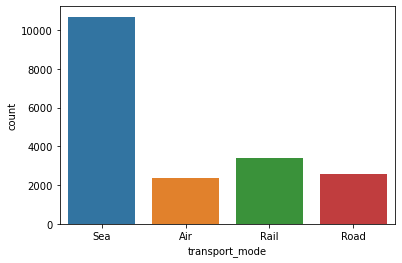

In [239]:
df['month']=df['date'].dt.month
df['ano_mes']=df['date'].dt.to_period('m')

#todos los años
sns.countplot(data=df, x='transport_mode')  

<AxesSubplot:xlabel='year', ylabel='valor'>

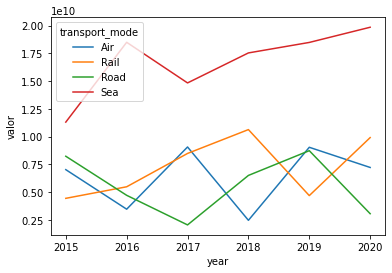

In [240]:
#organizado por año
transport_annual=df.groupby(by=['year','transport_mode'])
conteo_anual_transport=transport_annual['total_value'].describe()['count']
value_transport= transport_annual['total_value'].agg(pd.Series.sum)

info=pd.DataFrame()
info['conteo']=conteo_anual_transport
info['valor']=value_transport
sns.lineplot(x='year', y='valor', hue='transport_mode', data=info)

In [251]:
value_transport.sum()

year  transport_mode
2015  Air                7023000000
      Rail               4437488000
      Road               8231077000
      Sea               11306827000
2016  Air                3459111000
      Rail               5479198000
      Road               4710088000
      Sea               18500041000
2017  Air                9065068000
      Rail               8483234000
      Road               2042000000
      Sea               14838463000
2018  Air                2457374000
      Rail              10632394000
      Road               6502062000
      Sea               17542148000
2019  Air                9037995000
      Rail               4684366000
      Road               8732171000
      Sea               18486953000
2020  Air                7219599000
      Rail               9911363000
      Road               3053088000
      Sea               19856190000
Name: total_value, dtype: int64

In [241]:
ord_exportaciones=exportaciones.sort_values(by='total_sum',ascending=False)
total_exp=ord_exportaciones['total_sum'].sum()

ord_exportaciones['porcentaje']=(ord_exportaciones['total_sum']/total_exp)*100
ord_exportaciones['por_acum']=ord_exportaciones.cumsum()['porcentaje']

#total importaciones
ord_importaciones=importaciones.sort_values(by='total_sum',ascending=False)
total_imp=ord_importaciones['total_sum'].sum()
ord_importaciones['porcentaje']=(ord_importaciones['total_sum']/total_imp)*100
ord_importaciones['por_acum']=ord_importaciones.cumsum()['porcentaje']



In [242]:
top_80porciento_exp=ord_exportaciones[ord_exportaciones['por_acum']<80]
top_80porciento_imp=ord_importaciones[ord_importaciones['por_acum']<80]

In [246]:

top_80porciento_exp


,direction,origin,destination,transport_mode,count,mean,std,min,25%,50%,75%,max,total_sum,porcentaje,por_acum
34,Exports,China,Mexico,Air,330.0,3.712121e+07,2.582412e+07,0.0,19000000.0,35000000.0,52000000.0,140000000.0,12250000000,7.648444,7.648444
25,Exports,Canada,Mexico,Rail,261.0,3.237548e+07,2.433130e+07,0.0,11000000.0,31000000.0,49000000.0,103000000.0,8450000000,5.275865,12.924309
134,Exports,South Korea,Vietnam,Sea,497.0,1.383704e+07,1.071060e+07,0.0,6000000.0,11000000.0,18000000.0,65000000.0,6877007000,4.293747,17.218056
52,Exports,France,United Kingdom,Sea,147.0,3.691837e+07,2.166795e+07,9000000.0,22000000.0,32000000.0,44000000.0,128000000.0,5427000000,3.388417,20.606473
131,Exports,South Korea,Japan,Sea,279.0,1.646595e+07,8.336327e+06,2000000.0,10000000.0,15000000.0,20500000.0,45000000.0,4594000000,2.868323,23.474796
36,Exports,China,South Korea,Rail,144.0,3.149306e+07,1.720627e+07,1000000.0,20750000.0,31000000.0,41000000.0,81000000.0,4535000000,2.831485,26.306281
152,Exports,USA,Mexico,Rail,178.0,2.455056e+07,1.224654e+07,3000000.0,15000000.0,23000000.0,31000000.0,73000000.0,4370000000,2.728465,29.034746
42,Exports,France,Belgium,Road,105.0,4.054286e+07,2.420626e+07,8000000.0,24000000.0,34000000.0,50000000.0,148000000.0,4257000000,2.657912,31.692658
31,Exports,China,Germany,Air,142.0,2.880282e+07,1.532913e+07,5000000.0,17000000.0,26000000.0,37000000.0,101000000.0,4090000000,2.553644,34.246302
39,Exports,China,USA,Air,111.0,3.420721e+07,2.029291e+07,5000000.0,21000000.0,29000000.0,43500000.0,105000000.0,3797000000,2.370705,36.617008


In [248]:
totala=top_80porciento_exp['total_sum'].sum()
totala

127944001000

In [244]:
top_80porciento_imp

,direction,origin,destination,transport_mode,count,mean,std,min,25%,50%,75%,max,total_sum,porcentaje,por_acum
198,Imports,Singapore,Thailand,Sea,273.0,1.471429e+07,1.216850e+07,1000000.0,4000000.0,14000000.0,20000000.0,69000000.0,4017000000,7.234188,7.234188
184,Imports,Japan,Mexico,Sea,206.0,1.901942e+07,1.764251e+07,0.0,4000000.0,11000000.0,36000000.0,61000000.0,3918000000,7.055900,14.290088
190,Imports,Malaysia,Thailand,Rail,195.0,1.785641e+07,1.545128e+07,1000000.0,3000000.0,17000000.0,25000000.0,69000000.0,3482000000,6.270710,20.560798
173,Imports,China,United Arab Emirates,Sea,114.0,2.944737e+07,2.043123e+07,1000000.0,6000000.0,34500000.0,46000000.0,85000000.0,3357000000,6.045599,26.606397
167,Imports,China,Japan,Air,210.0,1.541429e+07,1.151013e+07,1000000.0,3000000.0,14500000.0,23000000.0,46000000.0,3237000000,5.829491,32.435888
171,Imports,China,Thailand,Road,145.0,1.921379e+07,1.652741e+07,1000000.0,5000000.0,15000000.0,27000000.0,78000000.0,2786000000,5.017289,37.453177
188,Imports,Japan,United Arab Emirates,Sea,76.0,2.944737e+07,1.776468e+07,2000000.0,10500000.0,32000000.0,43250000.0,58000000.0,2238000000,4.030399,41.483576
195,Imports,Mexico,USA,Rail,93.0,2.215054e+07,1.518935e+07,1000000.0,5000000.0,25000000.0,33000000.0,60000000.0,2060000000,3.709840,45.193416
203,Imports,Spain,Germany,Road,142.0,1.439437e+07,1.399035e+07,0.0,3000000.0,5500000.0,27750000.0,45000000.0,2044000000,3.681026,48.874442
178,Imports,Germany,Mexico,Sea,70.0,2.577143e+07,1.698181e+07,2000000.0,6000000.0,32500000.0,39000000.0,54000000.0,1804000000,3.248811,52.123253
